In [24]:
def hama_response():
    #select a random response within 10-99
    filename = 'ave1/C1--HighPulse-in-100-out1700-an2100--000' + str(np.random.randint(10,99)) + '.dat'
    time,h = np.loadtxt(filename,unpack=True)
    return time,h

<IPython.core.display.Javascript object>


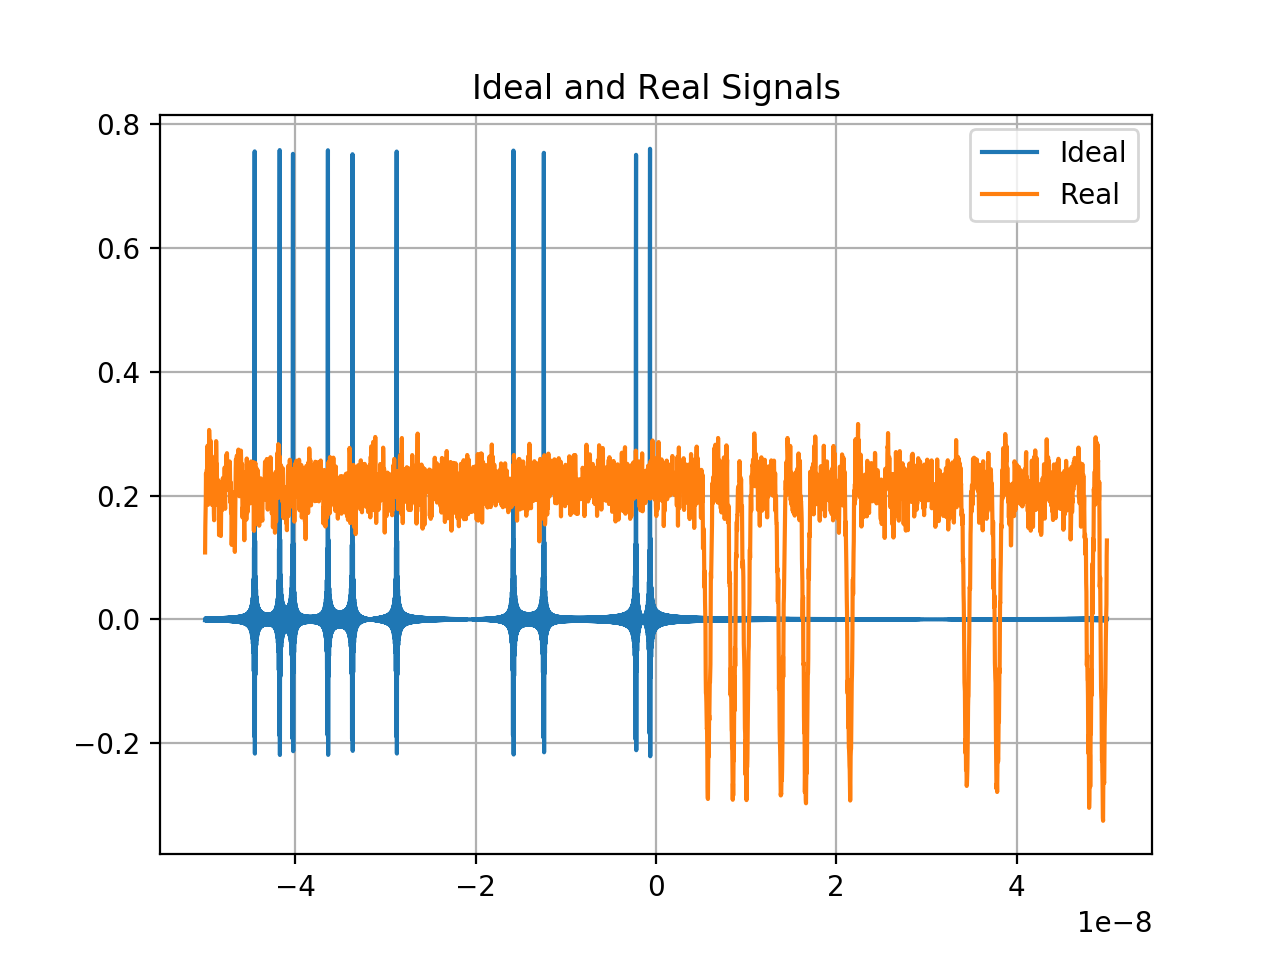

<IPython.core.display.Javascript object>


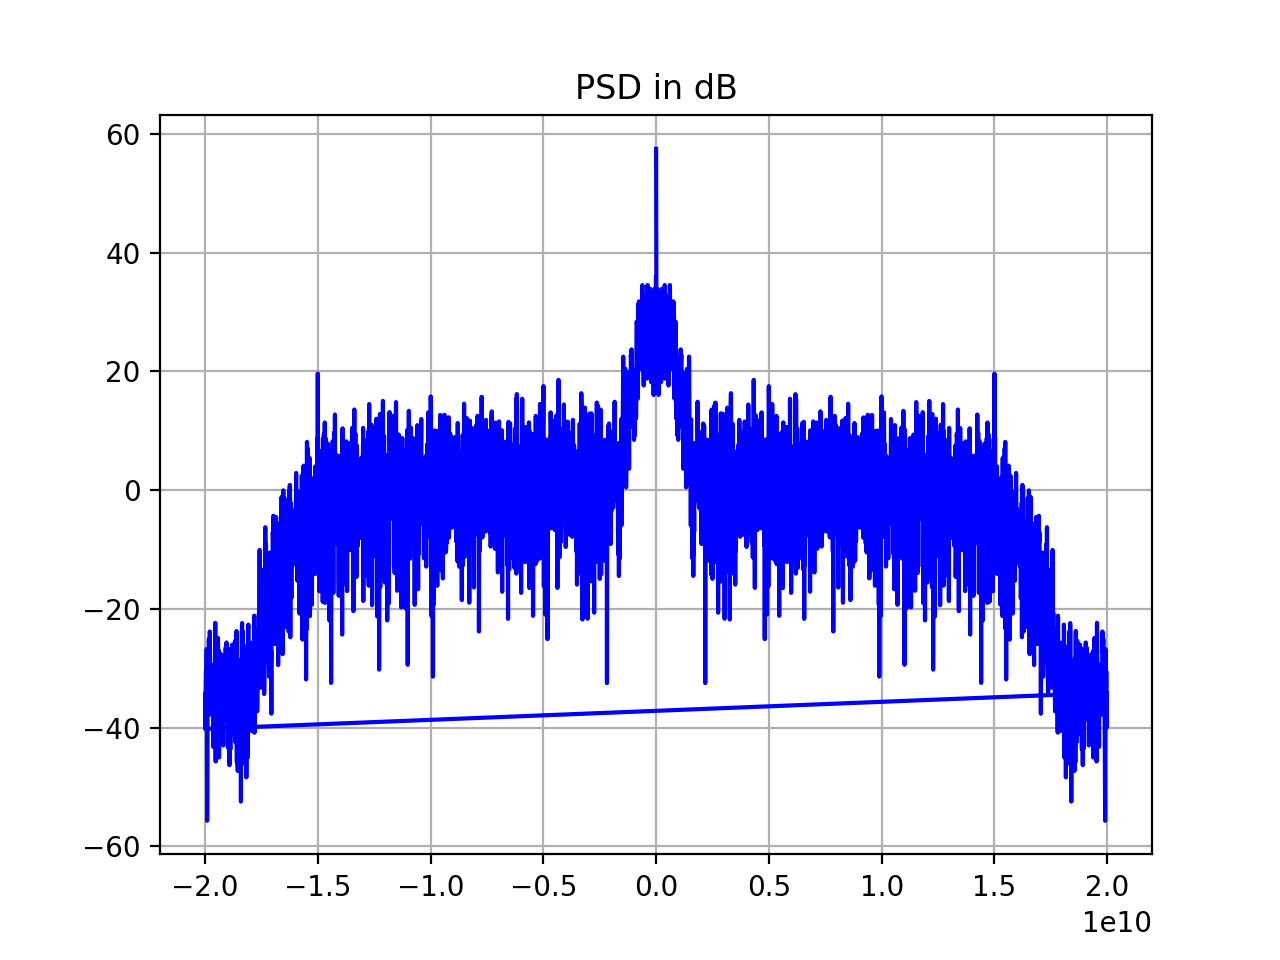

In [47]:
%matplotlib notebook

import numpy as np
from scipy.fftpack import fft, fftfreq, ifft
import matplotlib.pyplot as plt

N=10

freq = fftfreq(len(h),d = time[1]-time[0])
index = np.random.randint(len(time)/2,len(time),size=(N,1))


"""for i in range(N):
    time, h = hama_response()
    H[i] = fft(h)"""

time, h = hama_response()
H = fft(h)

S = np.exp(-2*np.pi*1j*freq*time[index])
G = S*H
S = np.sum(S,axis=0)
G = np.sum(G,axis=0)

sig_i = np.real(ifft(S))
sig_r = np.real(ifft(G))

fig = plt.figure()
ax = fig.subplots()
ax.plot(time,sig_i,label='Ideal')
ax.plot(time,sig_r,label='Real')
ax.set_title(label='Ideal and Real Signals')
ax.grid(True)
ax.legend()

fig = plt.figure()
ax = fig.subplots()
ax.plot(freq,20*np.log10(np.abs(G)),color='blue')
ax.set_title(label='PSD in dB')
ax.grid(True)

In [49]:
type(H)

numpy.ndarray